In [122]:
day = '8'

In [123]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# import matplotlib.gridspec as gridspec
# from scipy.stats import spearmanr
# import statsmodels.api as sm
import scipy

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
plt.rcParams['axes.linewidth'] = 0.5

In [124]:
repre = pd.read_csv(f'{Project}/Results/Tables/conversion_tables/representative-isoforms.txt', sep='\t', usecols=[0,1], header=None, names=['gene_id','transcript_id'])
display(repre)

full_name = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2023.2.Mm.chip', sep='\t')
full_name = full_name.rename(columns={'Probe Set ID':'gene_id', 'Gene Symbol':'gene_name', 'Gene Title':'full_name'})
full_name['full_name'] = full_name['full_name'].str.split('[').str[0]

display(full_name)

,gene_id,transcript_id
0,ENSMUSG00000000001.5,ENSMUST00000000001.5
1,ENSMUSG00000000003.16,ENSMUST00000000003.14
2,ENSMUSG00000000028.16,ENSMUST00000000028.14
3,ENSMUSG00000000031.17,ENSMUST00000136359.8
4,ENSMUSG00000000037.18,ENSMUST00000019101.11
...,...,...
55354,ENSMUSG00002076988.1,ENSMUST00020182589.1
55355,ENSMUSG00002076989.1,ENSMUST00000083836.4
55356,ENSMUSG00002076990.1,ENSMUST00020183326.1
55357,ENSMUSG00002076991.1,ENSMUST00020182837.1


,gene_id,gene_name,full_name
0,ENSMUSG00000000001,Gnai3,guanine nucleotide binding protein (G protein)...
1,ENSMUSG00000000003,Pbsn,probasin
2,ENSMUSG00000000028,Cdc45,cell division cycle 45
3,ENSMUSG00000000031,H19,"H19, imprinted maternally expressed transcript"
4,ENSMUSG00000000037,Scml2,Scm polycomb group protein like 2
...,...,...,...
43620,ENSMUSG00002076937,Gm25820,"predicted gene, 25820"
43621,ENSMUSG00002076971,Snord100,"small nucleolar RNA, C/D box 100"
43622,ENSMUSG00002076975,Gm23823,"predicted gene, 23823"
43623,ENSMUSG00002076989,Gm23510,"predicted gene, 23510"


In [125]:
# https://hongl.tistory.com/100

def modified_z_score(my_data):
    ## First Calculate Median
    median_my_data = np.median(my_data)
    
    ## Median Absolute Deviation 
    ## Median of | X_i - median of X| for all X_i
    mad = np.median(my_data.map(lambda x: np.abs(x - median_my_data)))
    
    ## Modified Z score
    ## 0.6745 * (X_i - median of X)/Median Absolute Deviation
    modified_z_score = list(my_data.map(lambda x: 0.6745* (x - median_my_data)/mad))
    return modified_z_score

In [126]:
RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
# RPF = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
PT = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_avg_log2FC.tsv', sep='\t')

RNA['gene_id'] = RNA['gene_id'].str.split('.').str[0]

RNA_z = RNA[['gene_id']].copy()
# RPF_z = RPF[['gene_id']].copy()
PT_z = PT[['uniprot_id']].copy()
for col in RNA.iloc[:,1:]:
    RNA_z[col] = modified_z_score(RNA[col])
# for col in RPF.iloc[:,1:]:
#     RPF_z[col] = modified_z_score(RPF[col])
for col in PT.iloc[:,1:]:
    PT_z[col] = modified_z_score(PT[col])

PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id')).sort_values('gene_id').drop_duplicates(subset=['gene_id'])
PT = pd.merge(PT_conv, PT, on='uniprot_id').drop(columns='uniprot_id')
PT_z = pd.merge(PT_conv, PT_z, on='uniprot_id').drop(columns='uniprot_id')

FC = pd.merge(RNA, PT, on='gene_id')
FC_z = pd.merge(RNA_z, PT_z, on='gene_id')
display(FC)
display(FC_z)

,gene_id,R4,R8,PT4,PT8
0,ENSMUSG00000033845,1.919982,2.397623,0.982792,0.996227
1,ENSMUSG00000025903,0.564052,0.894128,0.264329,0.694292
2,ENSMUSG00000033813,-0.823592,0.210519,-0.398329,-0.477997
3,ENSMUSG00000033793,0.192070,-0.043765,0.570325,0.779236
4,ENSMUSG00000025907,-0.130110,0.328257,-0.263798,-0.044767
...,...,...,...,...,...
4782,ENSMUSG00000064354,3.052747,3.297602,0.660836,0.836711
4783,ENSMUSG00000064356,4.596706,3.115628,1.151671,1.549004
4784,ENSMUSG00000064363,1.677543,2.216408,0.914687,1.253570
4785,ENSMUSG00000064367,1.287624,1.643277,0.823888,1.183640


,gene_id,R4,R8,PT4,PT8
0,ENSMUSG00000033845,1.975674,1.985230,1.932613,1.488729
1,ENSMUSG00000025903,0.626379,0.752237,0.498051,1.039500
2,ENSMUSG00000033813,-0.754474,0.191622,-0.825084,-0.704670
3,ENSMUSG00000033793,0.256218,-0.016913,1.109035,1.165882
4,ENSMUSG00000025907,-0.064386,0.288176,-0.556464,-0.060098
...,...,...,...,...,...
4782,ENSMUSG00000064354,3.102894,2.723287,1.289761,1.251396
4783,ENSMUSG00000064356,4.639297,2.574053,2.269816,2.311168
4784,ENSMUSG00000064363,1.734421,1.836618,1.796626,1.871611
4785,ENSMUSG00000064367,1.346410,1.366602,1.615328,1.767567


In [127]:
stalling_change_all = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult.tsv', sep='\t')
display(stalling_change_all)

stalling_estimated_genes = stalling_change_all[['transcript_id']].drop_duplicates()
stalling_estimated_genes = pd.merge(repre, stalling_estimated_genes, on='transcript_id')
stalling_estimated_genes['gene_id'] = stalling_estimated_genes['gene_id'].str.split('.').str[0]
display(stalling_estimated_genes)

,transcript_id,reltostart-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
0,ENSMUST00000000001.5,33,0.308259,0.356685,1.0,0.774119,1.000000,1.0
1,ENSMUST00000000001.5,36,0.926156,1.000000,1.0,1.161905,1.000000,1.0
2,ENSMUST00000000001.5,39,0.000000,0.231122,1.0,1.744579,0.667567,1.0
3,ENSMUST00000000001.5,42,inf,0.500555,1.0,NaN,1.000000,1.0
4,ENSMUST00000000001.5,45,0.462733,0.611056,1.0,0.580519,1.000000,1.0
...,...,...,...,...,...,...,...,...
2238001,ENSMUST00000239525.1,10461,0.000000,1.000000,1.0,0.000000,1.000000,1.0
2238002,ENSMUST00000239525.1,10464,1.561936,1.000000,1.0,0.000000,1.000000,1.0
2238003,ENSMUST00000239525.1,10467,0.520467,0.494876,1.0,0.000000,0.598884,1.0
2238004,ENSMUST00000239525.1,10470,0.669209,0.749590,1.0,0.767953,1.000000,1.0


,gene_id,transcript_id
0,ENSMUSG00000000001,ENSMUST00000000001.5
1,ENSMUSG00000000056,ENSMUST00000103015.4
2,ENSMUSG00000000078,ENSMUST00000000080.8
3,ENSMUSG00000000088,ENSMUST00000000090.8
4,ENSMUSG00000000127,ENSMUST00000000129.14
...,...,...
5019,ENSMUSG00000118491,ENSMUST00000142247.8
5020,ENSMUSG00000118552,ENSMUST00000238938.2
5021,ENSMUSG00000118653,ENSMUST00000239472.2
5022,ENSMUSG00000118664,ENSMUST00000239509.1


In [128]:
stalling_change = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult_sig.tsv', sep='\t')
stalling_change = pd.merge(repre, stalling_change, on='transcript_id', how='right').sort_values(f'D{day}_FDR')
stalling_change = stalling_change[stalling_change[f'D{day}_FDR']<0.01]
stalling_change = stalling_change[stalling_change[f'D{day}_OR']>1]
stalling_change['gene_id'] = stalling_change['gene_id'].str.split('.').str[0]

display(stalling_change)

,gene_id,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
23191,ENSMUSG00000026043,ENSMUST00000087883.13,3312,3102,GAA,E,1.803037,9.700806e-139,4.669321e-136,2.950872,0.000000,0.000000
1275,ENSMUSG00000001506,ENSMUST00000001547.8,1684,1539,GAA,E,1.458798,2.121448e-122,3.040035e-120,2.563152,0.000000,0.000000
1985,ENSMUSG00000001506,ENSMUST00000001547.8,4396,4251,UAC,Y,2.043079,4.208669e-79,3.547660e-77,5.968501,0.000000,0.000000
22993,ENSMUSG00000026043,ENSMUST00000087883.13,2547,2337,GAA,E,1.955971,1.695743e-96,3.060816e-94,4.260758,0.000000,0.000000
917,ENSMUSG00000001506,ENSMUST00000001547.8,226,81,GAA,E,3.045111,1.525542e-234,5.465254e-232,10.141205,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,ENSMUSG00000002957,ENSMUST00000003038.12,1159,972,UUG,L,2.130350,1.072801e-03,4.924158e-01,2.600783,0.000022,0.009951
13798,ENSMUSG00000031812,ENSMUST00000034270.17,368,204,CGG,R,2.531474,3.353894e-05,3.521589e-03,2.332870,0.000190,0.009973
22000,ENSMUSG00000055447,ENSMUST00000084838.14,1060,918,UAU,Y,3.201099,1.253081e-02,9.441867e-01,4.961735,0.000099,0.009985
24671,ENSMUSG00000022665,ENSMUST00000099498.10,2418,1752,AAA,K,1.258972,4.041560e-01,1.000000e+00,2.641265,0.000161,0.009993


In [129]:
codon_data = pd.read_csv(f'{Project}/Results/Tables/Codon_analysis/codon_usage/v20220503/gene-level_codon_usage.tsv', sep='\t')
codon_data = codon_data.rename(columns={'Transcript_ID':'transcript_id', 'Gene_ID':'gene_id', 'Gene_name':'gene_name'})
codon_data['Total_codon_num'] = codon_data.iloc[:,5:].sum(axis=1)
codon_data = pd.merge(repre, codon_data, on=['transcript_id','gene_id'])

for codon in codon_data.iloc[:,5:-1]:
    codon_data[codon] = codon_data[codon] / codon_data['Total_codon_num'] * 100

# display(codon_data)

codontab = {
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F',
    'TTA': 'L', 'TTG': 'L', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L','CTT': 'L',
    'TAC': 'Y', 'TAT': 'Y',
    # 'TAA': '*', 'TAG': '*', 'TGA': '*',
    'TGC': 'C', 'TGT': 'C',
    'TGG': 'W',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H',
    'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R','CGT': 'R', 'AGA': 'R', 'AGG': 'R',
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I',
    'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N',
    'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D',
    'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G'
}

AAs = []
codons = []
for codon, AA in codontab.items():
    AAs.append(AA)
    codons.append(codon.replace('T','U'))

AA_codon = pd.DataFrame({'AA':AAs, 'codon':codons})
AA2codon = AA_codon.groupby('AA')['codon'].apply(list).to_dict()
# display(AA2codon)

AA_ratio_data = codon_data[['transcript_id','gene_id','gene_name','Total_codon_num']].copy()
for AA in AA2codon:
    AA_ratio_data[AA] = codon_data[AA2codon[AA]].sum(axis=1)

AA_ratio_data['gene_id'] = AA_ratio_data['gene_id'].str.split('.').str[0]
display(AA_ratio_data)

AA_ratio_data_BG = pd.merge(stalling_estimated_genes[['gene_id']], AA_ratio_data, on='gene_id')
display(AA_ratio_data_BG)

,transcript_id,gene_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,ENSMUST00000000001.5,ENSMUSG00000000001,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,2.253521,3.943662,0.845070,3.661972,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352
1,ENSMUST00000000003.14,ENSMUSG00000000003,Pbsn,175,3.428571,2.285714,2.285714,7.428571,4.000000,5.714286,...,5.142857,5.714286,2.285714,4.000000,5.714286,4.000000,4.571429,7.428571,0.571429,5.142857
2,ENSMUST00000000028.14,ENSMUSG00000000028,Cdc45,567,5.467372,1.940035,7.760141,7.231041,5.467372,3.527337,...,2.821869,3.350970,2.469136,4.938272,5.291005,8.465608,5.114638,7.054674,1.410935,3.350970
3,ENSMUST00000019101.11,ENSMUSG00000000037,Scml2,906,7.395143,1.545254,6.512141,5.849890,4.304636,8.057395,...,0.883002,2.649007,8.830022,4.194260,6.622517,7.174393,8.498896,5.077263,1.766004,0.662252
4,ENSMUST00000000049.6,ENSMUSG00000000049,Apoh,346,5.491329,6.647399,3.468208,5.780347,5.491329,6.358382,...,2.023121,3.757225,9.826590,1.734104,4.046243,5.780347,6.936416,6.069364,1.445087,4.046243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21929,ENSMUST00000239545.1,ENSMUSG00000118670,Muc19,7525,19.933555,1.794020,1.235880,2.923588,0.611296,9.581395,...,0.225914,2.019934,5.940199,1.116279,2.232558,22.019934,22.325581,2.790698,0.199336,0.823920
21930,ENSMUST00000239552.1,ENSMUSG00000118671,Eppk1,3459,7.950275,0.896213,5.174906,7.776814,2.428448,8.123735,...,1.850246,1.618965,4.394334,6.620411,6.909511,6.042209,6.909511,7.805724,0.780572,2.515178
21931,ENSMUST00000239554.1,ENSMUSG00000118672,Muc4,3991,4.535204,1.202706,2.630920,3.081934,1.929341,4.585317,...,2.129792,3.583062,6.740165,6.940616,3.257329,18.892508,20.370834,3.958908,0.676522,1.353044
21932,ENSMUST00010126032.3,ENSMUSG00001074846,Iqcf3,204,8.823529,1.960784,5.392157,16.176471,0.490196,2.450980,...,0.980392,4.411765,3.431373,8.823529,6.372549,4.901961,5.392157,3.921569,2.450980,0.490196


,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,ENSMUSG00000000001,ENSMUST00000000001.5,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,2.253521,3.943662,0.845070,3.661972,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352
1,ENSMUSG00000000056,ENSMUST00000103015.4,Narf,463,6.911447,3.455724,5.615551,8.207343,3.887689,6.047516,...,1.295896,2.375810,3.887689,5.615551,5.183585,7.775378,4.751620,7.775378,0.647948,2.807775
2,ENSMUSG00000000078,ENSMUST00000000080.8,Klf6,319,3.134796,4.075235,5.642633,8.150470,4.075235,5.956113,...,0.940439,2.821317,7.210031,2.821317,6.269592,15.673981,5.015674,3.761755,1.567398,2.194357
3,ENSMUSG00000000088,ENSMUST00000000090.8,Cox5a,147,14.285714,2.721088,6.122449,7.482993,2.040816,4.761905,...,0.680272,2.721088,6.802721,0.680272,7.482993,4.761905,4.081633,6.122449,1.360544,3.401361
4,ENSMUSG00000000127,ENSMUST00000000129.14,Fer,824,4.854369,1.456311,4.611650,9.466019,2.791262,4.733010,...,2.912621,4.126214,3.155340,6.796117,3.762136,6.432039,4.975728,6.432039,1.092233,3.276699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,0.943396,1.698113,8.301887,3.962264,8.867925,8.113208,4.716981,3.396226,0.377358,2.075472
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,0.862069,3.448276,4.310345,0.862069,1.724138,10.344828,0.000000,6.896552,0.000000,1.724138
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,1.339286,4.464286,7.589286,0.892857,5.357143,4.910714,5.357143,4.464286,0.446429,2.232143
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,3.438395,4.871060,4.297994,4.871060,7.736390,7.449857,3.151862,5.730659,1.432665,3.724928


In [130]:
AA_ratio_data_FC = pd.merge(AA_ratio_data, FC, on='gene_id', how='left')
# display(AA_ratio_data_FC)

AA_ratio_data_BG_FC = pd.merge(AA_ratio_data_BG, FC, on='gene_id', how='left')
# display(AA_ratio_data_BG_FC)

AA_ratio_data_FC_z = pd.merge(AA_ratio_data, FC_z, on='gene_id', how='left')
# display(AA_ratio_data_FC_z)

AA_ratio_data_BG_FC_z = pd.merge(AA_ratio_data_BG, FC_z, on='gene_id', how='left')
# display(AA_ratio_data_BG_FC_z)

In [131]:
stall_num_AA_rank = list(stalling_change.groupby('aa-asite').size().reset_index(name='stall_num')[1:].sort_values('stall_num', ascending=False)['aa-asite'])

----

In [132]:
AA_stalled_genes = {}
for AA in stall_num_AA_rank:
    AA_stalled_genes[AA] = stalling_change[stalling_change['aa-asite']==AA][['gene_id']].drop_duplicates()
AA_multi_stalled_genes = {}

N = 10

AA_content_Nth_stalled_ratio = {}
for AA in stall_num_AA_rank:
    tmp = AA_ratio_data_BG_FC.sort_values(AA)
    # tmp = tmp[tmp[AA]>0]

    Nth = len(tmp)//N
    AA_content_Nth = {}
    for i in range(N):
        AA_content_Nth[i+1] = tmp[ Nth*i : Nth*(i+1)]
        if i==(N-1) : AA_content_Nth[i+1] = tmp[ Nth*i : ]

    AA_content_Nth_stalled_ratio[AA] = {}
    for part in AA_content_Nth:
        AA_content_Nth[part] = pd.merge(AA_content_Nth[part], AA_stalled_genes[AA], on='gene_id', how='left', indicator=True)
        AA_content_Nth_stalled_ratio[AA][part] = len(AA_content_Nth[part][AA_content_Nth[part]['_merge']=='both']) / len(AA_content_Nth[part]) * 100

AA_content_Nth_stalled_ratio = pd.DataFrame(AA_content_Nth_stalled_ratio)

AA_content_Nth_stalled_ratio = AA_content_Nth_stalled_ratio[stall_num_AA_rank]

display(AA_content_Nth_stalled_ratio)

,E,D,K,G,S,N,I,Y,P,L,A,W,T,V,R,C,Q,H,M,F
1,22.754491,2.794411,3.592814,2.395210,2.395210,0.798403,0.998004,1.397206,0.798403,4.391218,1.796407,0.000000,0.598802,1.197605,2.994012,0.000000,0.798403,0.798403,0.199601,0.399202
2,32.135729,5.389222,3.992016,2.794411,2.994012,3.393214,2.794411,2.395210,1.596806,3.193613,2.594810,1.397206,1.796407,0.998004,0.998004,0.598802,1.596806,1.197605,0.598802,0.399202
3,33.932136,8.183633,5.588822,2.994012,4.391218,2.594810,2.594810,1.197605,1.996008,3.992016,1.197605,1.397206,1.596806,2.395210,2.395210,0.000000,1.796407,0.998004,0.598802,0.798403
4,34.530938,10.578842,7.584830,3.592814,5.189621,2.594810,3.592814,2.195609,2.195609,3.592814,1.397206,1.197605,2.594810,1.996008,1.596806,0.998004,1.197605,1.796407,0.798403,0.598802
5,35.728543,9.780439,6.986028,5.588822,5.788423,2.994012,2.994012,4.191617,1.596806,2.594810,2.594810,2.195609,2.594810,1.796407,2.594810,0.798403,1.596806,2.195609,0.798403,0.399202
6,37.325349,11.377246,6.387226,5.189621,2.594810,4.590818,2.994012,2.195609,3.592814,2.794411,2.994012,3.193613,2.195609,3.792415,1.596806,0.998004,1.796407,1.397206,0.598802,0.598802
7,37.924152,14.970060,7.185629,6.986028,5.389222,5.189621,3.792415,4.391218,2.395210,2.594810,3.992016,1.996008,1.596806,2.195609,1.397206,1.796407,1.796407,0.598802,1.397206,0.598802
8,38.123752,12.774451,9.580838,7.584830,4.990020,4.990020,3.393214,3.393214,1.796407,3.992016,3.393214,3.992016,1.996008,1.397206,0.998004,1.197605,1.796407,1.596806,0.199601,0.399202
9,34.530938,13.173653,9.580838,8.582834,3.792415,3.992016,5.189621,4.790419,2.195609,2.594810,3.792415,3.992016,2.594810,3.193613,0.798403,1.596806,0.998004,1.197605,1.197605,0.199601
10,40.551181,15.354331,10.629921,8.858268,2.755906,6.496063,6.299213,5.118110,4.133858,2.755906,4.330709,5.708661,3.937008,1.181102,2.755906,5.511811,1.771654,1.181102,0.787402,0.984252


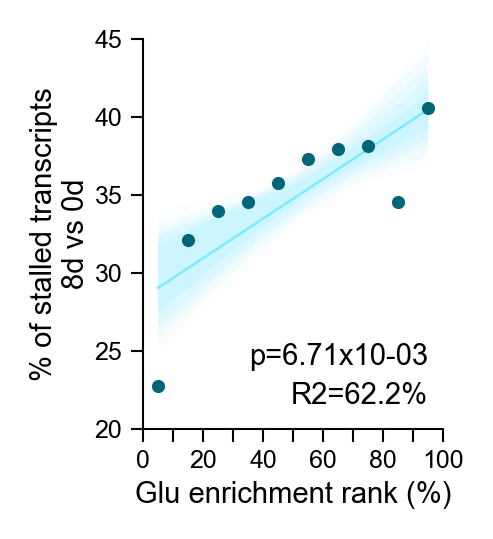

In [133]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1]
height_ratios = [1.3]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

# Main
x = np.array([*range(len(AA_content_Nth_stalled_ratio))])
y = np.array(AA_content_Nth_stalled_ratio['E'])
# ax.scatter(x, y,
#             s=5, c='#808080',
#             lw=0.3, edgecolors='k',
#             zorder=3)
tmp = pd.DataFrame({'x':x, 'y':y})

sns.regplot(x='x', y='y', data=tmp,
            # robust=True,
            scatter_kws = {'s':10,
                           'color':'#006677',
                           'linewidths':0,
                           'edgecolor':'k',
                           'alpha':1,
                           'zorder':3},
            line_kws = {'color':'#DFF9FF',
                        'alpha':1,
                        'lw':0.5},
            ci=95
            )
for ci,c in zip([90, 80, 70, 50],['#C9F4FF','#AEEEFF','#98EEFF','#77EEFF']):
    reg = sns.regplot(x='x', y='y', data=tmp,
                        scatter=False,
                        line_kws = {'color':c,
                                    'alpha':1,
                                    'lw':0.5},
                        ci=ci
                        )




ax.set_xlim(-0.5, N-0.5)
if day=='4' : ax.set_ylim(9, 17)
if day=='8' : ax.set_ylim(20, 45)
ax.set_xticks(np.array(range(0,11,1))-0.5)
ax.set_xticklabels([0,'',20,'',40,'',60,'',80,'',100], rotation=0)
ax.tick_params(width=0.5, length=3, pad=2)

ax.set_xlabel('Glu enrichment rank (%)', labelpad=2)
ax.set_ylabel(f'% of stalled transcripts\n{day}d vs 0d', labelpad=1)

# ax.set_facecolor('#E7E8E9')
# ax.grid(linestyle='-', c='#FFFFFF', lw=1)
# ax.grid(linestyle='-', c='#000000', lw=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


# regression stats----------------------
import scipy
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=tmp['x'], y=tmp['y'])

xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.text(xlim[0]+(xlim[1]-xlim[0])*0.95, ylim[0]+(ylim[1]-ylim[0])*0.15, f'p={pvalue:.2E}'.replace('E','x10'), horizontalalignment='right', verticalalignment='bottom', fontsize=7)
ax.text(xlim[0]+(xlim[1]-xlim[0])*0.95, ylim[0]+(ylim[1]-ylim[0])*0.05, f'R2={rvalue**2*100:.1f}%', horizontalalignment='right', verticalalignment='bottom', fontsize=7)
# ---------------------------------

plt.savefig(f'E-content_stalled-ratio_corr_scatter_{day}d.pdf', bbox_inches='tight')
plt.show()
plt.close()

----

In [134]:
N=10

AA_content_Nth_avgPTlogFC = {}
AA_content_Nth_PTlogFC_SEM = {}
for AA in ['E']:
    tmp = AA_ratio_data_BG_FC_z.sort_values(AA)

    Nth = len(tmp)//N
    AA_content_Nth = {}
    for i in range(N):
        AA_content_Nth[i+1] = tmp[ Nth*i : Nth*(i+1)]
        if i==(N-1) : AA_content_Nth[i+1] = tmp[ Nth*i : ]

    AA_content_Nth_avgPTlogFC[AA] = {}
    AA_content_Nth_PTlogFC_SEM[AA] = {}
    for part in AA_content_Nth:
        lowRNAch = AA_content_Nth[part]
        AA_content_Nth_avgPTlogFC[AA][part] = lowRNAch[f'PT{day}'].mean()
        AA_content_Nth_PTlogFC_SEM[AA][part] = np.std(lowRNAch[f'PT{day}'], ddof=1) / np.sqrt(np.size(lowRNAch[f'PT{day}']))

AA_content_Nth_avgPTlogFC = pd.DataFrame(AA_content_Nth_avgPTlogFC)
AA_content_Nth_PTlogFC_SEM = pd.DataFrame(AA_content_Nth_PTlogFC_SEM)

# AA_content_Nth_avgPTlogFC = AA_content_Nth_avgPTlogFC[stall_num_AA_rank]
# AA_content_Nth_PTlogFC_SEM = AA_content_Nth_PTlogFC_SEM[stall_num_AA_rank]

# display(AA_content_Nth_avgPTlogFC)
# display(AA_content_Nth_PTlogFC_SEM)

AA_content_Nth_avgRlogFC = {}
AA_content_Nth_RlogFC_SEM = {}
for AA in ['E']:
    tmp = AA_ratio_data_BG_FC_z.sort_values(AA)

    Nth = len(tmp)//N
    AA_content_Nth = {}
    for i in range(N):
        AA_content_Nth[i+1] = tmp[ Nth*i : Nth*(i+1)]
        if i==(N-1) : AA_content_Nth[i+1] = tmp[ Nth*i : ]

    AA_content_Nth_avgRlogFC[AA] = {}
    AA_content_Nth_RlogFC_SEM[AA] = {}
    for part in AA_content_Nth:
        lowRNAch = AA_content_Nth[part]
        AA_content_Nth_avgRlogFC[AA][part] = lowRNAch[f'R{day}'].mean()
        AA_content_Nth_RlogFC_SEM[AA][part] = np.std(lowRNAch[f'R{day}'], ddof=1) / np.sqrt(np.size(lowRNAch[f'R{day}']))

AA_content_Nth_avgRlogFC = pd.DataFrame(AA_content_Nth_avgRlogFC)
AA_content_Nth_RlogFC_SEM = pd.DataFrame(AA_content_Nth_RlogFC_SEM)

# AA_content_Nth_avgRlogFC = AA_content_Nth_avgRlogFC[stall_num_AA_rank]
# AA_content_Nth_RlogFC_SEM = AA_content_Nth_RlogFC_SEM[stall_num_AA_rank]

# display(AA_content_Nth_avgRlogFC)
# display(AA_content_Nth_RlogFC_SEM)

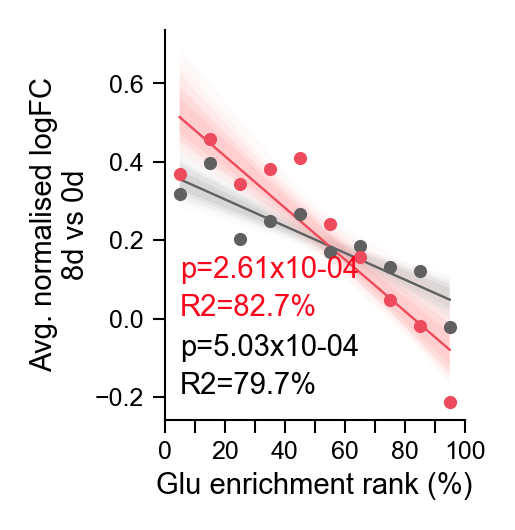

In [135]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1]
height_ratios = [1.3]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])


# Main
Rx = np.array([*range(len(AA_content_Nth_avgRlogFC))])
Ry = np.array(AA_content_Nth_avgRlogFC['E'])
Rsem = np.array(AA_content_Nth_RlogFC_SEM['E'])
# ax.scatter(Rx, Ry,
#             s=10, c='#606060',
#             lw=0, edgecolors='k',
#             zorder=3)
# ax.fill_between(Rx, y1=Ry+Rsem, y2=Ry-Rsem,
#                 color='#909090', alpha=0.3,
#                 lw=0)
R_tmp = pd.DataFrame({'x':Rx, 'y':Ry})
sns.regplot(x='x', y='y', data=R_tmp,
            # robust=True,
            scatter_kws = {'s':10,
                           'color':'#606060',
                           'linewidths':0,
                           'edgecolor':'k',
                           'alpha':1,
                           'zorder':3},
            line_kws = {'color':'#ECECEC',
                        'alpha':1,
                        'lw':0.5},
            ci=95
            )
for ci,c in zip([90, 80, 70, 50],['#DBDBDB','#C1C1C1','#A7A7A7','#909090']):
    reg = sns.regplot(x='x', y='y', data=R_tmp,
                        scatter=False,
                        line_kws = {'color':c,
                                    'alpha':1,
                                    'lw':0.5},
                        ci=ci
                        )

PTx = np.array([*range(len(AA_content_Nth_avgPTlogFC))])
PTy = np.array(AA_content_Nth_avgPTlogFC['E'])
PTsem = np.array(AA_content_Nth_PTlogFC_SEM['E'])
# ax.scatter(PTx, PTy,
#             s=10, c='#ed4a5e',
#             lw=0, edgecolors='k',
#             zorder=3)
# ax.fill_between(PTx, y1=PTy+PTsem, y2=PTy-PTsem,
#                 color='#ff8080', alpha=0.3,
#                 lw=0)
PT_tmp = pd.DataFrame({'x':PTx, 'y':PTy})
sns.regplot(x='x', y='y', data=PT_tmp,
            # robust=True,
            scatter_kws = {'s':10,
                           'color':'#ed4a5e',
                           'linewidths':0,
                           'edgecolor':'k',
                           'alpha':1,
                           'zorder':3},
            line_kws = {'color':'#FFE3E3',
                        'alpha':1,
                        'lw':0.5},
            ci=95
            )
for ci,c in zip([90, 80, 70, 50],['#FFCBCB','#FFB5B5','#FF9898','#FF8080']):
    reg = sns.regplot(x='x', y='y', data=PT_tmp,
                        scatter=False,
                        line_kws = {'color':c,
                                    'alpha':1,
                                    'lw':0.5},
                        ci=ci
                        )


ax.set_xlim(-0.5, 9.5)
ax.set_xticks(np.array(range(0,11,1))-0.5)
ax.set_xticklabels([0,'',20,'',40,'',60,'',80,'',100], rotation=0)
ax.tick_params(width=0.5, length=3, pad=2)

ax.set_xlabel('Glu enrichment rank (%)', labelpad=2)
ax.set_ylabel(f'Avg. normalised logFC\n{day}d vs 0d', labelpad=1)

# ax.set_facecolor('#E7E8E9')
# ax.grid(linestyle='-', c='#FFFFFF', lw=1)
# ax.grid(linestyle='-', c='#000000', lw=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


# regression stats----------------------
import scipy

tmp = R_tmp
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=tmp['x'], y=tmp['y'])
ax.plot(tmp['x'], tmp['x']*slope+intercept, c='#606060', lw=0.5)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.text(xlim[0]+(xlim[1]-xlim[0])*0.05, ylim[0]+(ylim[1]-ylim[0])*0.05, f'R2={rvalue**2*100:.1f}%', horizontalalignment='left', verticalalignment='bottom', fontsize=7)
ax.text(xlim[0]+(xlim[1]-xlim[0])*0.05, ylim[0]+(ylim[1]-ylim[0])*0.15, f'p={pvalue:.2E}'.replace('E','x10'), horizontalalignment='left', verticalalignment='bottom', fontsize=7)

tmp = PT_tmp
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=tmp['x'], y=tmp['y'])
ax.plot(tmp['x'], tmp['x']*slope+intercept, c='#ed4a5e', lw=0.5)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.text(xlim[0]+(xlim[1]-xlim[0])*0.05, ylim[0]+(ylim[1]-ylim[0])*0.25, f'R2={rvalue**2*100:.1f}%', color='#F8071D', horizontalalignment='left', verticalalignment='bottom', fontsize=7)
ax.text(xlim[0]+(xlim[1]-xlim[0])*0.05, ylim[0]+(ylim[1]-ylim[0])*0.35, f'p={pvalue:.2E}'.replace('E','x10'), color='#F8071D', horizontalalignment='left', verticalalignment='bottom', fontsize=7)
# ---------------------------------


plt.savefig(f'Reduced_RNAnPT_by_E-content_{day}d.pdf', bbox_inches='tight')
plt.show()
plt.close()

-------------

In [136]:
RGs = [
    (-0.85, -0.25),
    (-0.25, 0.25),
    (0.25, 0.85)
]

data_dict_PT = {}
data_dict_PT_SEM = {}
data_dict_R = {}
data_dict_R_SEM = {}

N = 10

for RGpair in RGs:
    RGname = f'{RGpair[0]}~{RGpair[1]}'

    AA_content_Nth_lowRNAch_avgPTlogFC = {}
    AA_content_Nth_lowRNAch_PTlogFC_SEM = {}
    for AA in AA2codon:
        tmp = AA_ratio_data_BG_FC_z.sort_values(AA)

        Nth = len(tmp)//N
        AA_content_Nth = {}
        for i in range(N):
            AA_content_Nth[i+1] = tmp[ Nth*i : Nth*(i+1)]
            if i==(N-1) : AA_content_Nth[i+1] = tmp[ Nth*i : ]

        AA_content_Nth_lowRNAch_avgPTlogFC[AA] = {}
        AA_content_Nth_lowRNAch_PTlogFC_SEM[AA] = {}
        for part in AA_content_Nth:
            lowRNAch = AA_content_Nth[part][ (RGpair[0]<AA_content_Nth[part][f'R{day}'])&(AA_content_Nth[part][f'R{day}']<RGpair[1]) ]
            AA_content_Nth_lowRNAch_avgPTlogFC[AA][part] = lowRNAch[f'PT{day}'].mean()
            AA_content_Nth_lowRNAch_PTlogFC_SEM[AA][part] = np.std(lowRNAch[f'PT{day}'], ddof=1) / np.sqrt(np.size(lowRNAch[f'PT{day}']))

    AA_content_Nth_lowRNAch_avgPTlogFC = pd.DataFrame(AA_content_Nth_lowRNAch_avgPTlogFC)
    AA_content_Nth_lowRNAch_PTlogFC_SEM = pd.DataFrame(AA_content_Nth_lowRNAch_PTlogFC_SEM)

    AA_content_Nth_lowRNAch_avgPTlogFC = AA_content_Nth_lowRNAch_avgPTlogFC[stall_num_AA_rank]
    AA_content_Nth_lowRNAch_PTlogFC_SEM = AA_content_Nth_lowRNAch_PTlogFC_SEM[stall_num_AA_rank]

    # display(AA_content_Nth_lowRNAch_avgPTlogFC)
    # display(AA_content_Nth_lowRNAch_PTlogFC_SEM)


    AA_content_Nth_lowRNAch_avgRlogFC = {}
    AA_content_Nth_lowRNAch_RlogFC_SEM = {}
    for AA in AA2codon:
        tmp = AA_ratio_data_BG_FC_z.sort_values(AA)

        Nth = len(tmp)//N
        AA_content_Nth = {}
        for i in range(N):
            AA_content_Nth[i+1] = tmp[ Nth*i : Nth*(i+1)]
            if i==(N-1) : AA_content_Nth[i+1] = tmp[ Nth*i : ]

        AA_content_Nth_lowRNAch_avgRlogFC[AA] = {}
        AA_content_Nth_lowRNAch_RlogFC_SEM[AA] = {}
        for part in AA_content_Nth:
            lowRNAch = AA_content_Nth[part][ (RGpair[0]<AA_content_Nth[part][f'R{day}'])&(AA_content_Nth[part][f'R{day}']<RGpair[1]) ]
            AA_content_Nth_lowRNAch_avgRlogFC[AA][part] = lowRNAch[f'R{day}'].mean()
            AA_content_Nth_lowRNAch_RlogFC_SEM[AA][part] = np.std(lowRNAch[f'R{day}'], ddof=1) / np.sqrt(np.size(lowRNAch[f'PT{day}']))

    AA_content_Nth_lowRNAch_avgRlogFC = pd.DataFrame(AA_content_Nth_lowRNAch_avgRlogFC)
    AA_content_Nth_lowRNAch_RlogFC_SEM = pd.DataFrame(AA_content_Nth_lowRNAch_RlogFC_SEM)

    AA_content_Nth_lowRNAch_avgRlogFC = AA_content_Nth_lowRNAch_avgRlogFC[stall_num_AA_rank]
    AA_content_Nth_lowRNAch_RlogFC_SEM = AA_content_Nth_lowRNAch_RlogFC_SEM[stall_num_AA_rank]

    # display(AA_content_Nth_lowRNAch_avgRlogFC)

    data_dict_PT[RGname] = AA_content_Nth_lowRNAch_avgPTlogFC
    data_dict_PT_SEM[RGname] = AA_content_Nth_lowRNAch_PTlogFC_SEM
    data_dict_R[RGname] = AA_content_Nth_lowRNAch_avgRlogFC
    data_dict_R_SEM[RGname] = AA_content_Nth_lowRNAch_RlogFC_SEM

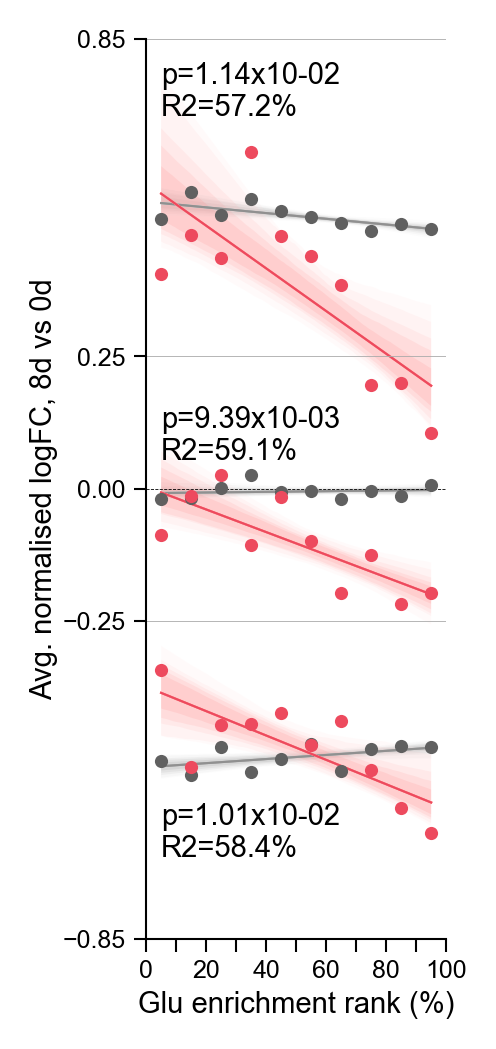

In [137]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1]
height_ratios = [3]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

R_ylim  = (-0.85,0.85)

# R scatter
for RG in data_dict_R:
    Rx = np.array([*range(len(data_dict_R[RG]))])
    Ry = np.array(data_dict_R[RG]['E'])
    Rsem = np.array(data_dict_R_SEM[RG]['E'])
    # ax.scatter(Rx, Ry,
    #             s=10, c='#606060',
    #             lw=0, edgecolors='k',
    #             zorder=3)
    # ax.fill_between(Rx, y1=Ry+Rsem, y2=Ry-Rsem,
    #                 color='#909090', alpha=0.3,
    #                 lw=0)
    R_tmp = pd.DataFrame({'x':Rx, 'y':Ry})
    sns.regplot(x='x', y='y', data=R_tmp,
                # robust=True,
                scatter_kws = {'s':10,
                            'color':'#606060',
                            'linewidths':0,
                            'edgecolor':'k',
                            'alpha':1,
                            'zorder':3},
                line_kws = {'color':'#ECECEC',
                            'alpha':1,
                            'lw':0.5},
                ci=95
                )
    for ci,c in zip([90, 80, 70, 50],['#DBDBDB','#C1C1C1','#A7A7A7','#909090']):
        reg = sns.regplot(x='x', y='y', data=R_tmp,
                            scatter=False,
                            line_kws = {'color':c,
                                        'alpha':1,
                                        'lw':0.5},
                            ci=ci
                            )


# PT scatter
for RG in data_dict_PT:
    PTx = np.array([*range(len(data_dict_PT[RG]))])
    PTy = np.array(data_dict_PT[RG]['E'])
    PTsem = np.array(data_dict_PT_SEM[RG]['E'])
    # ax.scatter(PTx, PTy,
    #             s=10, c='#ed4a5e',
    #             lw=0, edgecolors='k',
    #             zorder=3)
    # ax.fill_between(PTx, y1=PTy+PTsem, y2=PTy-PTsem,
    #                 color='#ff8080', 
    #                 # color='#F8071D', 
    #                 alpha=0.2, lw=0)
    PT_tmp = pd.DataFrame({'x':PTx, 'y':PTy})
    sns.regplot(x='x', y='y', data=PT_tmp,
                # robust=True,
                scatter_kws = {'s':10,
                            'color':'#ed4a5e',
                            'linewidths':0,
                            'edgecolor':'k',
                            'alpha':1,
                            'zorder':3},
                line_kws = {'color':'#FFE3E3',
                            'alpha':1,
                            'lw':0.5},
                ci=95
                )
    for ci,c in zip([90, 80, 70, 50],['#FFCBCB','#FFB5B5','#FF9898','#FF8080']):
        sns.regplot(x='x', y='y', data=PT_tmp,
                        scatter=False,
                        line_kws = {'color':c,
                                    'alpha':1,
                                    'lw':0.5},
                        ci=ci
                        )
        
    # regression stats
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=PT_tmp['x'], y=PT_tmp['y'])
    ax.plot(PTx, PTx*slope+intercept, c='#ed4a5e', lw=0.5)
    xpos = {RG:x for RG,x in zip(data_dict_PT,[0,0,0])}
    ypos = {RG:y for RG,y in zip(data_dict_PT,[-0.65, 0.1, 0.75])}
    ax.text(xpos[RG], ypos[RG], f'p={pvalue:.2E}\nR2={rvalue**2*100:.1f}%'.replace('E','x10'), horizontalalignment='left', verticalalignment='center', fontsize=7)

ax.set_xlim(-0.5, 9.5)
ax.set_ylim(-0.85, 0.85)
ax.set_xticks(np.array(range(0,11,1))-0.5)
ax.set_yticks([-0.85, -0.25, 0, 0.25, 0.85])
ax.set_xticklabels([0,'',20,'',40,'',60,'',80,'',100], rotation=0)
ax.tick_params(length=3, width=0.5, pad=1)

ax.axhline(-0.85, c='#AAAAAA', lw=0.2)
ax.axhline(-0.25, c='#AAAAAA', lw=0.2)
ax.axhline(0.25, c='#AAAAAA', lw=0.2)
ax.axhline(0.85, c='#AAAAAA', lw=0.2)

ax.axhline(0, c='#000000', lw=0.2, linestyle='--')
ax.tick_params(width=0.5, length=3, pad=2)

ax.set_xlabel('Glu enrichment rank (%)', labelpad=2)
ax.set_ylabel(f'Avg. normalised logFC, {day}d vs 0d', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig(f'Reduced_protein_synthesis_by_E-content_{day}d.pdf', bbox_inches='tight')
plt.show()
plt.close()